In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
# These top lines are critical for import from another folder
sys.path.insert(1, '/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/')

import numpy as np 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import glob
import pickle
import os

import pipe_util2
import pipe_1_img_edt as edt1
import pipe_2_edt_watershed as ws2
import pipe_3_traj_reorganize_1st as tr1
import pipe_4_traj_reorganize_2nd as tr2
import pipe_5_traj_reorganize_3rd as tr3
import pipe_6_build_single_cell as p6
import pipe_7_cell_contours_calculation as p7
import pipe_8_haralick_calculation as p8
import pipe_9_morph_pca as p9
import pipe_10_haralick_pca as p10
import sbatch_jobs

pd.set_option('display.max_columns', 999)

Using TensorFlow backend.


model path: ./models/dld1.hdf5 use binary? (if false then edt applied): False
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 270476560262147555
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4934556243380643956
physical_device_desc: "device: XLA_CPU device"
]


In [2]:
img_path = "./sample_data/06-21-21-B1_02_crop_part_30/"
output_path = "./sample_data/06-21-21-B1_02_crop_part_30_output/"

img_path = os.path.abspath(img_path)+"/"
output_path = os.path.abspath(output_path)+"/"

weight = "./sample_data/models/imgseg_weights/7-21-21-dld1_edt_fcn_add1_ep100.hdf5"
weight = os.path.abspath(weight) 

icnn_am_weights = "./sample_data/models/icnn_am_weights/062121_dld1B102_am.hdf5"
icnn_seg_weights = './sample_data/models/icnn_seg_weights/DLD1_icnn_seg-Copy1.hdf5'

icnn_am_weights = os.path.abspath(icnn_am_weights)
icnn_seg_weights = os.path.abspath(icnn_seg_weights)

mode = "reg_seg"
scr_folder = "./scripts/"
name = "dld1_b202"

In [3]:
img_path

'/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30/'

# Step 1 Edt calc (python)

In [8]:
# also in the 1-Edt prediction notebook 
model_mode = "reg_seg"
edt1.folder_edt_predict(img_path, output_path, weight, model_mode)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



KeyboardInterrupt: 

# Step 2 Watershed with icnn (python)

In [6]:
# inline works. 
# pretty fast.
ws2.simple_edt_watershed(img_path, output_path, icnn_am_weights, icnn_seg_weights, small_obj_thres = 10)
# issues might come from the resource insufficient for my interactive job. 
# assign more memory in sbatch file. 

/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/seg/ folder is freshly created. 

/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/rgb_num/ folder is freshly created. 

image: 0/29
/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30/VID99_B1_2_00d00h00m.tif
5
5

image: 1/29
/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30/VID99_B1_2_00d04h05m.tif
4
4
image: 2/29
/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30/VID99_B1_2_00d08h15m.tif
4
4
image: 3/29
/net/capricorn/home/xin

KeyboardInterrupt: 

### Step 2 Watershed with icnn (sbatch)

In [7]:
# script can also work
scr_folder = "./scripts/"
name = "dld1_b202"

sbatch_jobs.sbatch_job_2_watershed(scr_folder, 
                       img_path, output_path, 
                       icnn_am_weights, icnn_seg_weights,
                       name)

# Step 3 Cellprofiler (sbatch)

In [4]:
# This code works
# Notice the cellprofiler runs for the /seg folder, which is the predicted imaging labels.
# Only this way, the dimension will be the same with next steps.
sbatch_jobs.sbatch_job_3_cellprofiler(scr_folder, output_path, name)

# Step 4 Trajectory 1 (python)

In [5]:
tr1.traj_reconganize1(img_path, output_path, icnn_seg_weights)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


processing /net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30
Current Time = 18:36:19
traj quantity 70
traj quantity 70
processing 1/29 images
2
3
4
5
processing 2/29 images
1
2
3
4
processing 3/29 images
1
2
3
4
processing 4/29 images
1
3
7
4
6
processing 5/29 images
1
3
2
5
4
8
7
6
processing 6/29 images
3
2
1
5
4
6
8
7
processing 7/29 images
3
2
4
5
6
7
8
9
processing 8/29 images
1
3
2
4
5
6
7
9
8
10
11
12
13
processing 9/29 images
2
1
4
3
7
5
6
8
10
9
13
12
11
14
15
16
processing 10/29 images
2
1
4
3
5
6
8
10
9
14
12
16
13
11
17
processing 11/29 images
1
2
4
3
7
8
6
12
13
11
15
17
10
5
14
16
19
18
21
24
22
23
processing 12/29 images
1
3
9
2
4
6
5
10
15
8
14
13
12
16
11
18
19
20
22
24
21
25
23
processing 13/29 images
2
1
8
3
17
11
6
9
4
7
12
10
13
14
15
19
20
21
22
23
24
18
26
25
31
27
28
30
processing 

# Step 4 Trajectory 2

In [3]:
tr2.traj_reconganize2(output_path)

traj quantity 126
(5, 6)
traj quantity 110
traj quantity 110


In [4]:
tr3.traj_reconganize3(output_path)

traj quantity 110
traj quantity 48
traj quantity 48
traj quantity 48


In [5]:
p6.build_single_cell(output_path)

/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/cells/ folder is freshly created. 



In [11]:
# The mean contour is calculated in /Other2_Various/pipe_meancontour_and_pca_modes.ipynb
mean_contour_path = output_path + "dld1_ctrl_mean_cell_contour"
p7.cell_contours_calculation(output_path, mean_contour_path)

In [4]:
# if you want the haralick for fluorescent images
# put the floracent image folder path here. 
p8.single_folder_run(img_path, output_path)

position:/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/, progress:1/29
position:/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/, progress:2/29
position:/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/, progress:3/29
position:/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/, progress:4/29
position:/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/06-21-21-B1_02_crop_part_30_output/, progress:5/29
position:/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipelin

/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/ has 1 files
(358, 300)
[0.85524833 0.07389075 0.01507922 0.01284916 0.00861718 0.00838671
 0.00533361 0.00390116] 0.983306115995967
/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/ has 1 files
(564, 13)
[[ 9.07810316e-02 -3.15412804e-01 -2.62111775e-01 -3.13980864e-01
   3.05462625e-01 -1.13045618e-04 -3.08941632e-01 -3.36486790e-01
  -9.50022239e-02  3.14606874e-01 -3.55051405e-01  3.11166875e-01
  -3.03516144e-01]
 [ 5.18399340e-01  1.99565041e-01  3.36322915e-02  2.48810509e-01
   1.75491501e-01  3.15477450e-01  2.54086823e-01 -1.83493085e-01
  -5.28314263e-01  2.32250353e-01 -5.89395853e-02 -2.51624305e-01
  -3.89588880e-04]
 [ 1.04958547e-01 -2.76344718e-02 -2.76648726e-01 -1.19194143e-01
  -1.64424494e-01  8.53519349e-01 -1.34227480e-01  5.97265361e-02
   2.67346183e-01 -1.71224345e-0

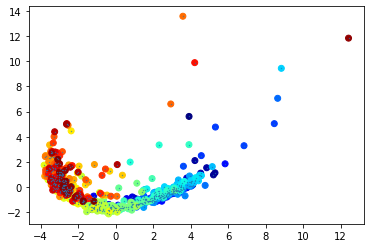

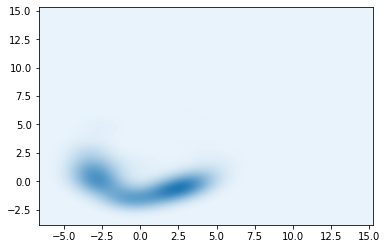

In [5]:
top_path = "/net/capricorn/home/xing/huijing/Segmentation/scripts/Image_analysis_pipeline_vim_dic/7-21-21-pipeline-testing/sample_data/"
p9.morph_pca(top_path)
p10.haralick_pca(top_path)